# Muggle to Wizard Data Cleaning

In [1]:
!rm -rf ../data

In [2]:
import os
import sys

module_path = '{}/code'.format(os.path.abspath(os.path.join('..')))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import utils
from variables import *

!mkdir ../data
utils.download_files(BOOKS)
utils.download_files(EXTRAS)
utils.extract_html_table(SPELLS, na_values=['—'])

Downloaded 'hp1_sorcerers_stone' to 'data/' folder.
Downloaded 'hp2_chamber_of_secrets' to 'data/' folder.
Downloaded 'hp3_prisioner_of_azkaban' to 'data/' folder.
Downloaded 'hp4_globet_of_fire' to 'data/' folder.
Downloaded 'hp5_order_of_the_phoenix' to 'data/' folder.
Downloaded 'hp6_half_blood_prince' to 'data/' folder.
Downloaded 'hp7_deathly_hallows' to 'data/' folder.
Downloaded 'hp_places_list' to 'data/' folder.
Downloaded 'hp_characters_list' to 'data/' folder.
Downloaded 'hp_classes_list' to 'data/' folder.
Downloaded 'hp_spells_list' to 'data/' folder.


In [4]:
import glob
import json
import pandas as pd

books, spells, extras = {}, {}, {}

for f in sorted(glob.glob(os.path.join('../data', '*.txt'))):
    with open(f, 'r', encoding='utf-8', errors='ignore') as file:
        books[os.path.splitext(os.path.basename(f))[0]] = file.read().replace('\n', ' ')
        
for f in sorted(glob.glob(os.path.join('../data', '*.csv'))):
    extras[os.path.splitext(os.path.basename(f))[0]] = pd.read_csv(f, header=None)[0].tolist()
        
spells = pd.read_json(glob.glob(os.path.join('../data', '*.json'))[0], lines=True)
spells = spells[~spells['Resulting Effect'].str.contains('game')]

In [5]:
spells.head(10)

,Incantation,Resulting Effect,Type
0,Aberto,Opens objects,Charm
1,Accio,Summons an object,Charm
2,Age Line,Hides things from younger people,Enchanment
3,Aguamenti,Shoots water from wand.,Charm
4,Alarte Ascendare,Shoots things high in the air,Spell
5,Alohomora,Opens locked objects,Charm
6,Anapneo,Clears the target’s airway.,Spell
7,Anteoculatia,Turns head hair into antlers,Hex
8,Anti-Cheating,Prevents Cheating on Exams,Spell
9,Aparecium,Reveals invisible ink,Spell


In [6]:
extras.keys()

dict_keys(['hp_characters_list', 'hp_classes_list', 'hp_places_list'])

In [7]:
books['hp1_sorcerers_stone'][:500]

"Harry Potter and the Sorcerer's Stone   CHAPTER ONE   THE BOY WHO LIVED   Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.   Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large musta"

In [8]:
try:
    import string
    import nltk
    from nltk import word_tokenize, ngrams
    from nltk.corpus import stopwords
except:
    import string
    import nltk
    from nltk import word_tokenize, ngrams
    nltk.download('stopwords')
    from nltk.corpus import stopwords

In [9]:
punc = str.maketrans('', '', string.punctuation)

def normalize_text(text):
    tokens = word_tokenize(text.translate(punc))    
    sw = stopwords.words('english')
    content = [w.lower() for w in tokens if w.lower() not in sw]
    return content
    
def get_bigrams(text):
    tokens = word_tokenize(text.translate(punc))    
    return ngrams(tokens, 2)
    
def get_trigrams(text):
    tokens = word_tokenize(text.translate(punc))    
    return ngrams(tokens, 3)

def get_wordcount(text):
    tokens = word_tokenize(text.translate(punc))    
    return len(tokens)
    
def get_unique_wordcount(text):
    tokens = word_tokenize(text.translate(punc))    
    return len(set(tokens))
    
def get_punctuation_count(text):
    punctuation = [c for c in text if c in string.punctuation]
    return len(punctuation)

In [10]:
books_clean = {}

for book in books.keys():
    books_clean[book] = normalize_text(books[book])
    books_clean['{}_bigrams'.format(book)] = get_bigrams(books[book])
    books_clean['{}_trigrams'.format(book)] = get_trigrams(books[book])
    books_clean['{}_wordcount'.format(book)] = get_wordcount(books[book])
    books_clean['{}_unique_words_count'.format(book)] = get_unique_wordcount(books[book])
    books_clean['{}_punctuation_count'.format(book)] = get_punctuation_count(books[book])

In [11]:
books_clean.keys()

dict_keys(['hp1_sorcerers_stone', 'hp1_sorcerers_stone_bigrams', 'hp1_sorcerers_stone_trigrams', 'hp1_sorcerers_stone_wordcount', 'hp1_sorcerers_stone_unique_words_count', 'hp1_sorcerers_stone_punctuation_count', 'hp2_chamber_of_secrets', 'hp2_chamber_of_secrets_bigrams', 'hp2_chamber_of_secrets_trigrams', 'hp2_chamber_of_secrets_wordcount', 'hp2_chamber_of_secrets_unique_words_count', 'hp2_chamber_of_secrets_punctuation_count', 'hp3_prisioner_of_azkaban', 'hp3_prisioner_of_azkaban_bigrams', 'hp3_prisioner_of_azkaban_trigrams', 'hp3_prisioner_of_azkaban_wordcount', 'hp3_prisioner_of_azkaban_unique_words_count', 'hp3_prisioner_of_azkaban_punctuation_count', 'hp4_globet_of_fire', 'hp4_globet_of_fire_bigrams', 'hp4_globet_of_fire_trigrams', 'hp4_globet_of_fire_wordcount', 'hp4_globet_of_fire_unique_words_count', 'hp4_globet_of_fire_punctuation_count', 'hp5_order_of_the_phoenix', 'hp5_order_of_the_phoenix_bigrams', 'hp5_order_of_the_phoenix_trigrams', 'hp5_order_of_the_phoenix_wordcount', 

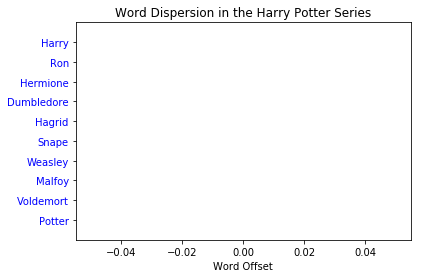

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

all_books_t = list()
hp = ''

for b in books.keys():
    all_books_t = all_books_t + books_clean[b]
    hp = hp + ' ' + books[b]

all_text = nltk.Text(all_books_t)
characters = extras['hp_characters_list']
characters = set([c.split()[0] for c in extras['hp_characters_list']] + [c.split()[-1] for c in extras['hp_characters_list']])
characters = [t for t in characters if t != 'The']

c_aux = {}

for c in characters:
    c_aux[c] = hp.count(c)
    
most_important_dudes = sorted(c_aux.items(), key=lambda kv: kv[1], reverse=True)
most_important_dudes = [t[0] for t in most_important_dudes[:10]]

#all_text.dispersion_plot(most_important_dudes)

fig = nltk.draw.dispersion_plot(
    all_text, most_important_dudes, ignore_case=False,
    title='Word Dispersion in the Harry Potter Series'
)

plt.figimage(fig)
plt.show()

In [13]:
type(books_clean['hp1_sorcerers_stone'])

list

In [14]:
all_text[:100]

['harry',
 'potter',
 'sorcerers',
 'stone',
 'chapter',
 'one',
 'boy',
 'lived',
 'mr',
 'mrs',
 'dursley',
 'number',
 'four',
 'privet',
 'drive',
 'proud',
 'say',
 'perfectly',
 'normal',
 'thank',
 'much',
 'last',
 'people',
 'youd',
 'expect',
 'involved',
 'anything',
 'strange',
 'mysterious',
 'didnt',
 'hold',
 'nonsense',
 'mr',
 'dursley',
 'director',
 'firm',
 'called',
 'grunnings',
 'made',
 'drills',
 'big',
 'beefy',
 'man',
 'hardly',
 'neck',
 'although',
 'large',
 'mustache',
 'mrs',
 'dursley',
 'thin',
 'blonde',
 'nearly',
 'twice',
 'usual',
 'amount',
 'neck',
 'came',
 'useful',
 'spent',
 'much',
 'time',
 'craning',
 'garden',
 'fences',
 'spying',
 'neighbors',
 'dursleys',
 'small',
 'son',
 'called',
 'dudley',
 'opinion',
 'finer',
 'boy',
 'anywhere',
 'dursleys',
 'everything',
 'wanted',
 'also',
 'secret',
 'greatest',
 'fear',
 'somebody',
 'would',
 'discover',
 'didnt',
 'think',
 'could',
 'bear',
 'anyone',
 'found',
 'potters',
 'mrs',
 'p

In [15]:
pos_words = pd.read_csv('../resources/positive-words.txt',
                        sep='\n',
                        header=None,
                        names=['pos_words'],
                        encoding='latin1')

neg_words = pd.read_csv('../resources/negative-words.txt',
                        sep='\n',
                        header=None,
                        names=['neg_words'],
                        encoding='latin1')

pos_words = list(pos_words['pos_words'])
neg_words = list(neg_words['neg_words'])

In [16]:
books_tokens = {book: books_clean[book] for book in books.keys()}

for bt in books_tokens.keys():
    pos_count, neg_count = 0, 0
    for t in books_tokens[bt]:
        if t in pos_words:
            pos_count = pos_count + 1
        elif t in neg_words:
            neg_count = neg_count + 1
    print('Book {}: {} positive words / {} negative words'.format(bt, pos_count, neg_count))

Book hp1_sorcerers_stone: 1977 positive words / 2325 negative words
Book hp2_chamber_of_secrets: 2110 positive words / 2949 negative words
Book hp3_prisioner_of_azkaban: 2526 positive words / 3456 negative words
Book hp4_globet_of_fire: 5039 positive words / 6341 negative words
Book hp5_order_of_the_phoenix: 6604 positive words / 8732 negative words
Book hp6_half_blood_prince: 4709 positive words / 5776 negative words
Book hp7_deathly_hallows: 4947 positive words / 7216 negative words
